In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
attrition=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
attrition

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
attrition.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
attrition.tail()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ï»¿Age                    1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
attrition.keys()

Index(['ï»¿Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
attrition.dtypes

ï»¿Age                       int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
#finding the null data
attrition.isna().sum()

ï»¿Age                      0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
#finding the duplicate data
attrition.duplicated().sum()

0

In [11]:
attrition.shape

(1470, 35)

In [12]:
attrition['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [13]:
attrition['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
attrition['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [15]:
#dropping the unnecessary columns to reduce the size of the data
attrition=attrition.drop(columns='BusinessTravel',axis=1)
attrition=attrition.drop(columns='ï»¿Age',axis=1)
attrition=attrition.drop(columns='DistanceFromHome',axis=1)
attrition=attrition.drop(columns='EmployeeCount',axis=1)
attrition=attrition.drop(columns='Education',axis=1)
attrition=attrition.drop(columns='StockOptionLevel',axis=1)
attrition=attrition.drop(columns='WorkLifeBalance',axis=1)
attrition=attrition.drop(columns='Over18',axis=1)
attrition=attrition.drop(columns='Gender',axis=1)
attrition=attrition.drop(columns='JobInvolvement',axis=1)
attrition=attrition.drop(columns='MaritalStatus',axis=1)

In [16]:
from sklearn import preprocessing
a=preprocessing.LabelEncoder()
attrition['Department']=a.fit_transform(attrition['Department'])

In [17]:

a=preprocessing.LabelEncoder()
attrition['JobRole']=a.fit_transform(attrition['JobRole'])

In [18]:

a=preprocessing.LabelEncoder()
attrition['OverTime']=a.fit_transform(attrition['OverTime'])

In [19]:

a=preprocessing.LabelEncoder()
attrition['EducationField']=a.fit_transform(attrition['OverTime'])

In [20]:

a=preprocessing.LabelEncoder()
attrition['Attrition']=a.fit_transform(attrition['Attrition'])

In [21]:
attrition

,Attrition,DailyRate,Department,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobLevel,JobRole,JobSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1102,2,1,1,2,94,2,7,4,...,11,3,1,80,8,0,6,4,0,5
1,0,279,1,0,2,3,61,2,6,2,...,23,4,4,80,10,3,10,7,1,7
2,1,1373,1,1,4,4,92,1,2,3,...,15,3,2,80,7,3,0,0,0,0
3,0,1392,1,1,5,4,56,1,6,3,...,11,3,3,80,8,3,8,7,3,0
4,0,591,1,0,7,1,40,1,2,2,...,12,3,4,80,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,884,1,0,2061,3,41,2,2,4,...,17,3,3,80,17,3,5,2,0,3
1466,0,613,1,0,2062,4,42,3,0,1,...,15,3,1,80,9,5,7,7,1,7
1467,0,155,1,1,2064,2,87,2,4,2,...,20,4,2,80,6,0,6,2,0,3
1468,0,1023,2,0,2065,4,63,2,7,2,...,14,3,4,80,17,3,9,6,0,8


In [22]:
#correlation
attrition.corr()

,Attrition,DailyRate,Department,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobLevel,JobRole,JobSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.056652,0.063991,0.246118,-0.010577,-0.103369,-0.006846,-0.169105,0.067151,-0.103481,...,-0.013478,0.002889,-0.045872,NaN,-0.171063,-0.059478,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,-0.056652,1.000000,0.007109,0.009135,-0.050990,0.018355,0.023381,0.002966,-0.009472,0.030571,...,0.022704,0.000473,0.007846,NaN,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
Department,0.063991,0.007109,1.000000,0.007481,-0.010895,-0.019395,-0.004144,0.101963,0.662431,0.021001,...,-0.007840,-0.024604,-0.022414,NaN,-0.015762,0.036875,0.022920,0.056315,0.040061,0.034282
EducationField,0.246118,0.009135,0.007481,1.000000,-0.024037,0.070132,-0.007782,0.000544,0.040662,0.024539,...,-0.005433,0.004369,0.048493,NaN,0.012754,-0.079113,-0.011687,-0.029758,-0.012239,-0.041586
EmployeeNumber,-0.010577,-0.050990,-0.010895,-0.024037,1.000000,0.017621,0.035179,-0.018519,-0.010336,-0.046247,...,-0.012944,-0.020359,-0.069861,NaN,-0.014365,0.023603,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.018355,-0.019395,0.070132,0.017621,1.000000,-0.049857,0.001212,-0.017321,-0.006784,...,-0.031701,-0.029548,0.007665,NaN,-0.002693,-0.019359,0.001458,0.018007,0.016194,-0.004999
HourlyRate,-0.006846,0.023381,-0.004144,-0.007782,0.035179,-0.049857,1.000000,-0.027853,-0.018861,-0.071335,...,-0.009062,-0.002172,0.001330,NaN,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
JobLevel,-0.169105,0.002966,0.101963,0.000544,-0.018519,0.001212,-0.027853,1.000000,-0.085457,-0.001944,...,-0.034730,-0.021222,0.021642,NaN,0.782208,-0.018191,0.534739,0.389447,0.353885,0.375281
JobRole,0.067151,-0.009472,0.662431,0.040662,-0.010336,-0.017321,-0.018861,-0.085457,1.000000,0.017537,...,-0.000848,-0.024233,-0.020218,NaN,-0.145439,0.001342,-0.083657,-0.028354,-0.046384,-0.041150
JobSatisfaction,-0.103481,0.030571,0.021001,0.024539,-0.046247,-0.006784,-0.071335,-0.001944,0.017537,1.000000,...,0.020002,0.002297,-0.012454,NaN,-0.020185,-0.005779,-0.003803,-0.002305,-0.018214,-0.027656


# Classification of data

In [23]:
x=attrition.drop(columns=['Attrition'],axis=1)
print(x)

      DailyRate  Department  EducationField  EmployeeNumber  \
0          1102           2               1               1   
1           279           1               0               2   
2          1373           1               1               4   
3          1392           1               1               5   
4           591           1               0               7   
...         ...         ...             ...             ...   
1465        884           1               0            2061   
1466        613           1               0            2062   
1467        155           1               1            2064   
1468       1023           2               0            2065   
1469        628           1               0            2068   

      EnvironmentSatisfaction  HourlyRate  JobLevel  JobRole  JobSatisfaction  \
0                           2          94         2        7                4   
1                           3          61         2        6                2   


In [24]:
y=attrition['Attrition']
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32


# Data Visualization

<Figure size 2000x600 with 0 Axes>

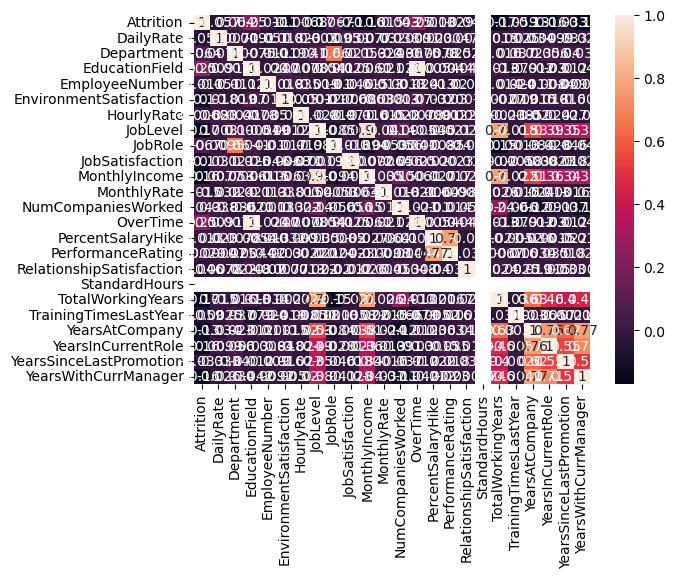

<Figure size 2000x600 with 0 Axes>

In [25]:
corr_hmap = attrition.corr()
heatmap = sns.heatmap(attrition.corr(), annot=True)
plt.figure(figsize=(20, 6))



# CountPlot

<function matplotlib.pyplot.show(close=None, block=None)>

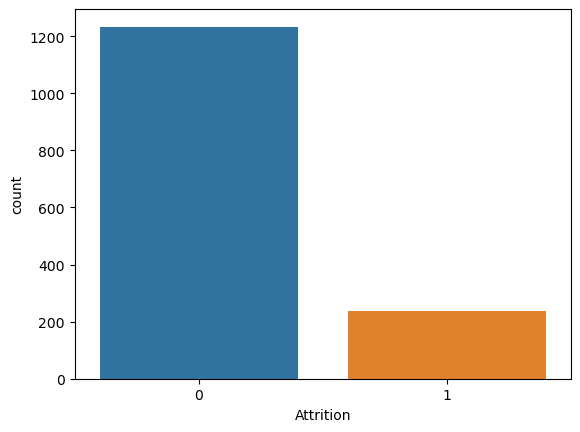

In [26]:
sns.countplot(x ='Attrition', data = attrition)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

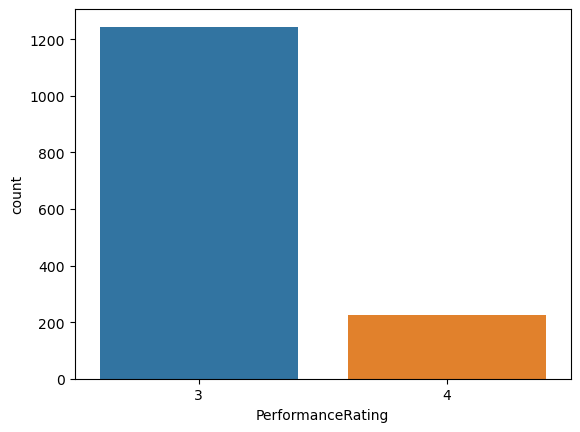

In [27]:
sns.countplot(x ='PerformanceRating', data = attrition)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

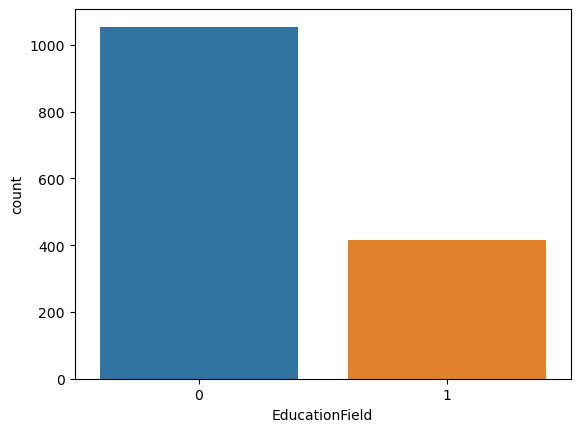

In [28]:
sns.countplot(x ='EducationField', data = attrition)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

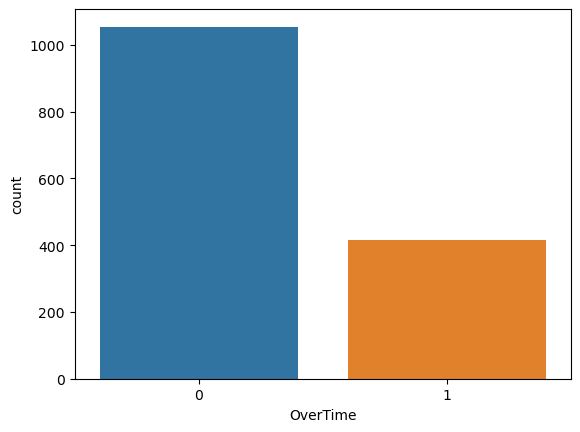

In [29]:
sns.countplot(x ='OverTime', data = attrition)
plt.show

# DistPlot

<function matplotlib.pyplot.show(close=None, block=None)>

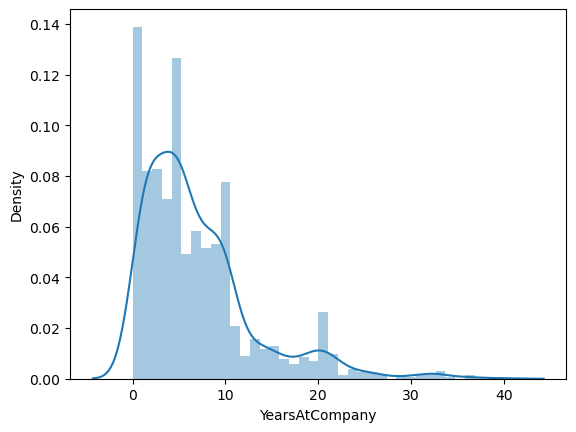

In [149]:
sns.distplot(attrition['YearsAtCompany'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

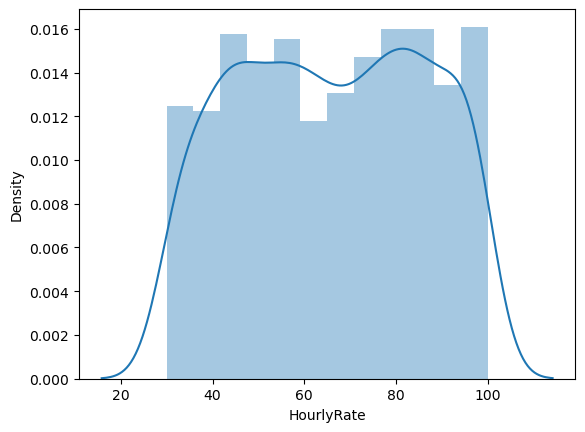

In [31]:
sns.distplot(attrition['HourlyRate'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

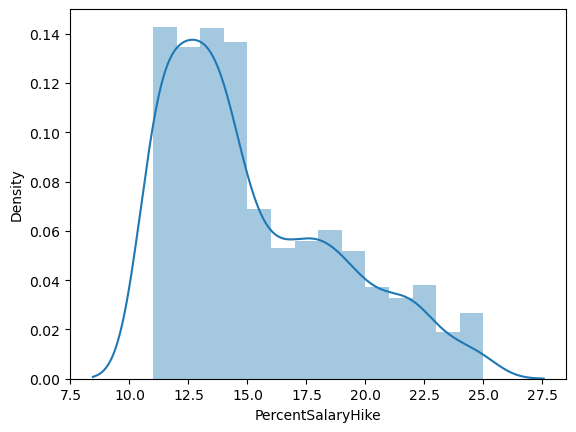

In [32]:
sns.distplot(attrition['PercentSalaryHike'])
plt.show

# BarPlot

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

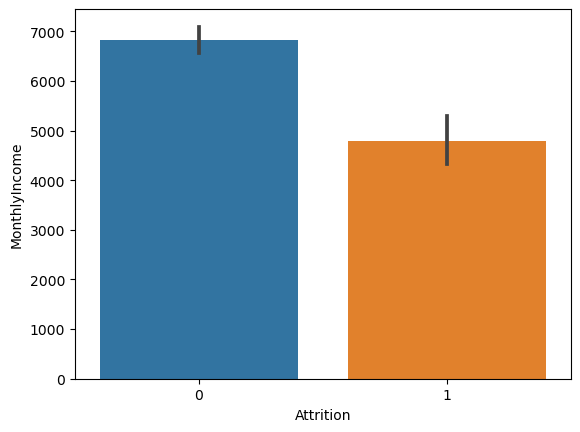

In [33]:

sns.barplot(x='Attrition',y='MonthlyIncome',data=attrition)

<Axes: xlabel='OverTime', ylabel='MonthlyIncome'>

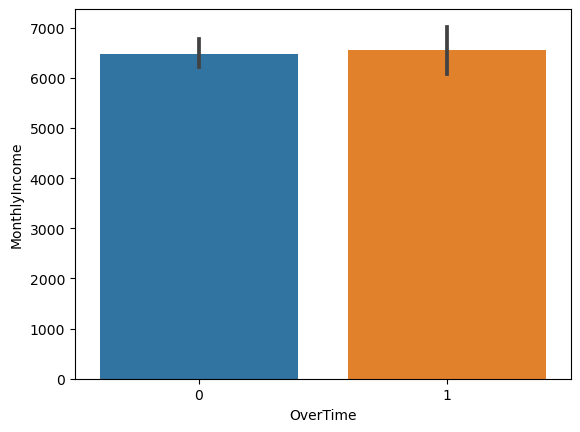

In [34]:

sns.barplot(x='OverTime',y='MonthlyIncome',data=attrition)

<Axes: xlabel='YearsAtCompany', ylabel='JobSatisfaction'>

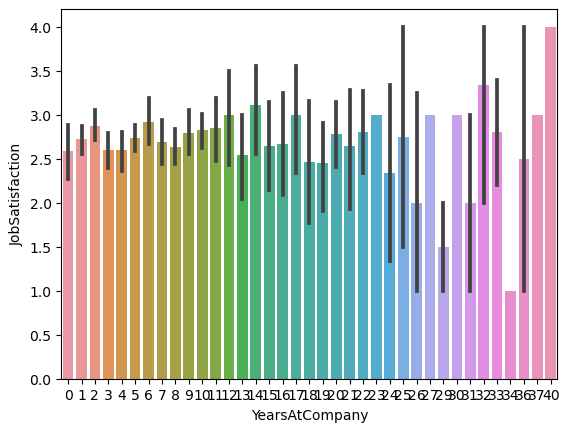

In [35]:

sns.barplot(x='YearsAtCompany',y='JobSatisfaction',data=attrition)

<Axes: xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

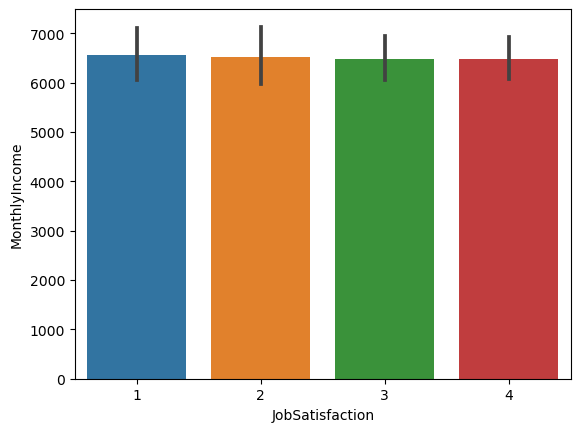

In [36]:

sns.barplot(x='JobSatisfaction',y='MonthlyIncome',data=attrition)

# Violin Plot

<Axes: xlabel='Department', ylabel='EducationField'>

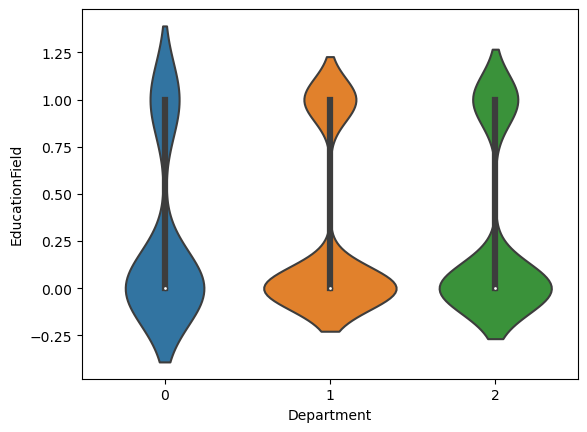

In [37]:
sns.violinplot(x='Department',y='EducationField',data=attrition)

<Axes: xlabel='Attrition', ylabel='HourlyRate'>

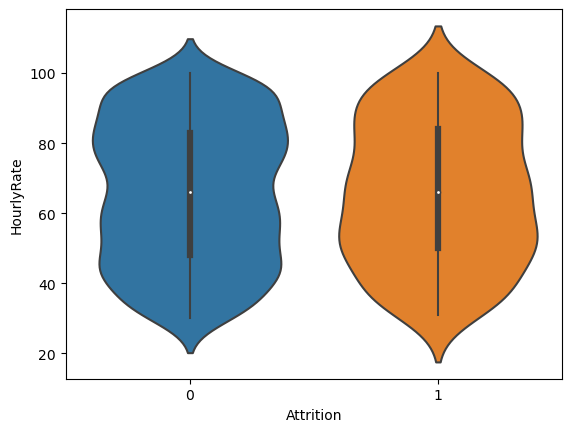

In [38]:
sns.violinplot(x='Attrition',y='HourlyRate',data=attrition)

<Axes: xlabel='TrainingTimesLastYear', ylabel='JobSatisfaction'>

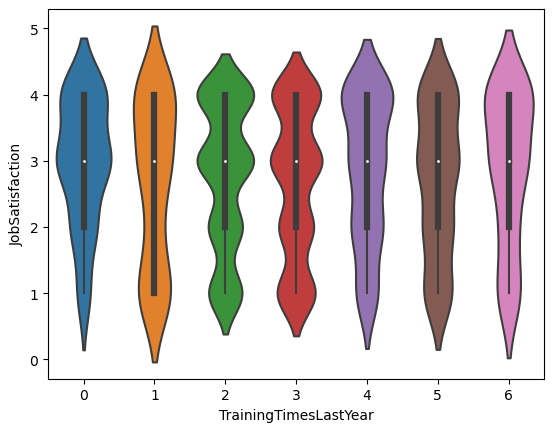

In [39]:
sns.violinplot(x='TrainingTimesLastYear',y='JobSatisfaction',data=attrition)

# Box Plot

Attrition                      Axes(0.125,0.747241;0.133621x0.132759)
DailyRate                   Axes(0.285345,0.747241;0.133621x0.132759)
Department                   Axes(0.44569,0.747241;0.133621x0.132759)
EducationField              Axes(0.606034,0.747241;0.133621x0.132759)
EmployeeNumber              Axes(0.766379,0.747241;0.133621x0.132759)
EnvironmentSatisfaction        Axes(0.125,0.587931;0.133621x0.132759)
HourlyRate                  Axes(0.285345,0.587931;0.133621x0.132759)
JobLevel                     Axes(0.44569,0.587931;0.133621x0.132759)
JobRole                     Axes(0.606034,0.587931;0.133621x0.132759)
JobSatisfaction             Axes(0.766379,0.587931;0.133621x0.132759)
MonthlyIncome                  Axes(0.125,0.428621;0.133621x0.132759)
MonthlyRate                 Axes(0.285345,0.428621;0.133621x0.132759)
NumCompaniesWorked           Axes(0.44569,0.428621;0.133621x0.132759)
OverTime                    Axes(0.606034,0.428621;0.133621x0.132759)
PercentSalaryHike   

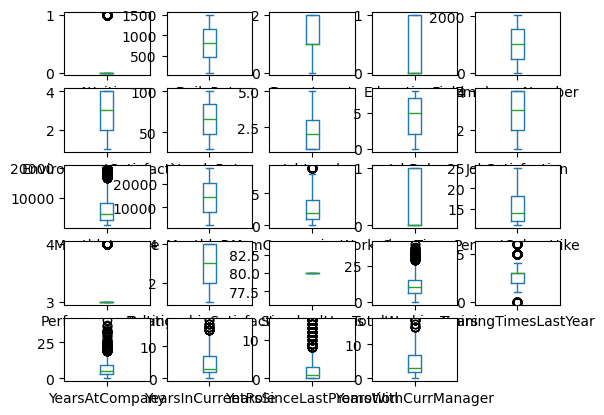

In [40]:
attrition.plot(kind='box',subplots=True,layout=(5,5))

# Histogram

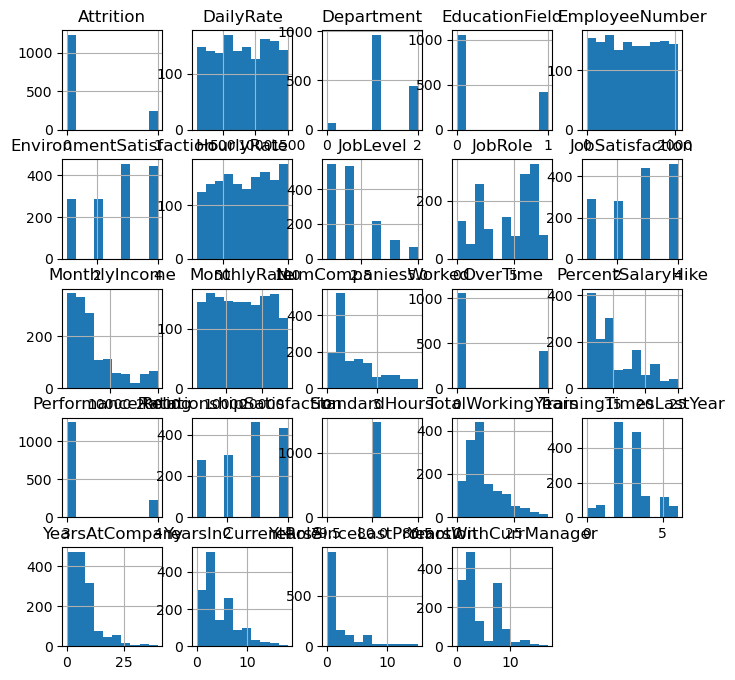

In [41]:
attrition.hist(figsize=(8,8),bins=10)
plt.show()

# Scatter Plot

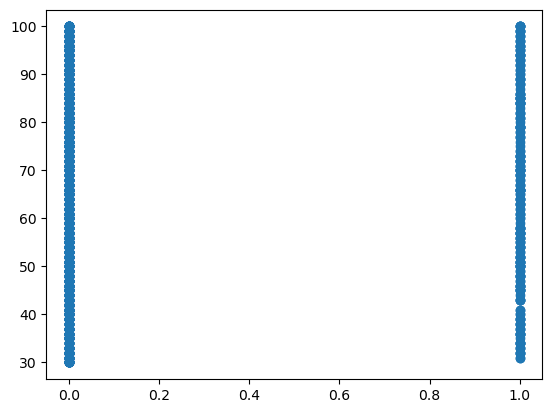

In [42]:
plt.scatter(attrition['Attrition'],attrition['HourlyRate'])
plt.show()

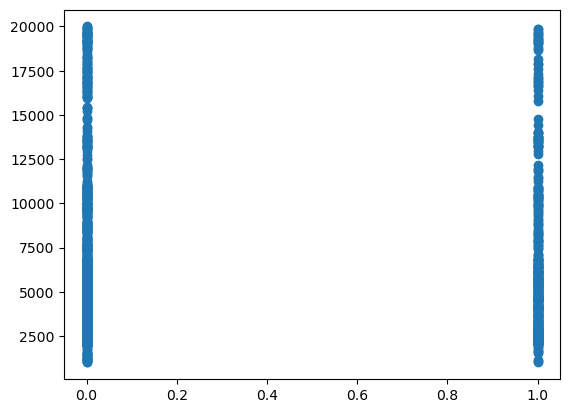

In [43]:
plt.scatter(attrition['OverTime'],attrition['MonthlyIncome'])
plt.show()

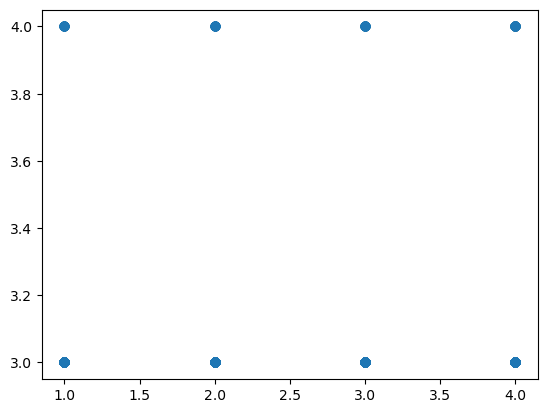

In [44]:
plt.scatter(attrition['JobSatisfaction'],attrition['PerformanceRating'])
plt.show()

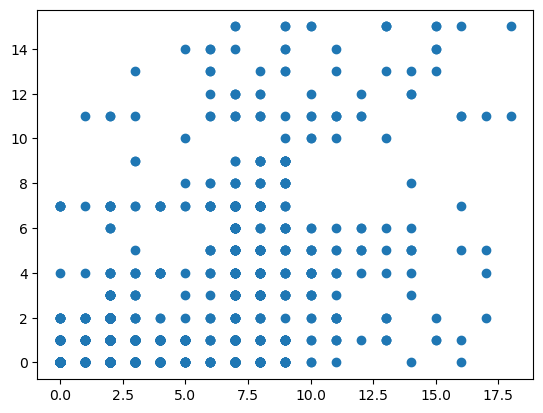

In [45]:
plt.scatter(attrition['YearsInCurrentRole'],attrition['YearsSinceLastPromotion'])
plt.show()

# PairPlot

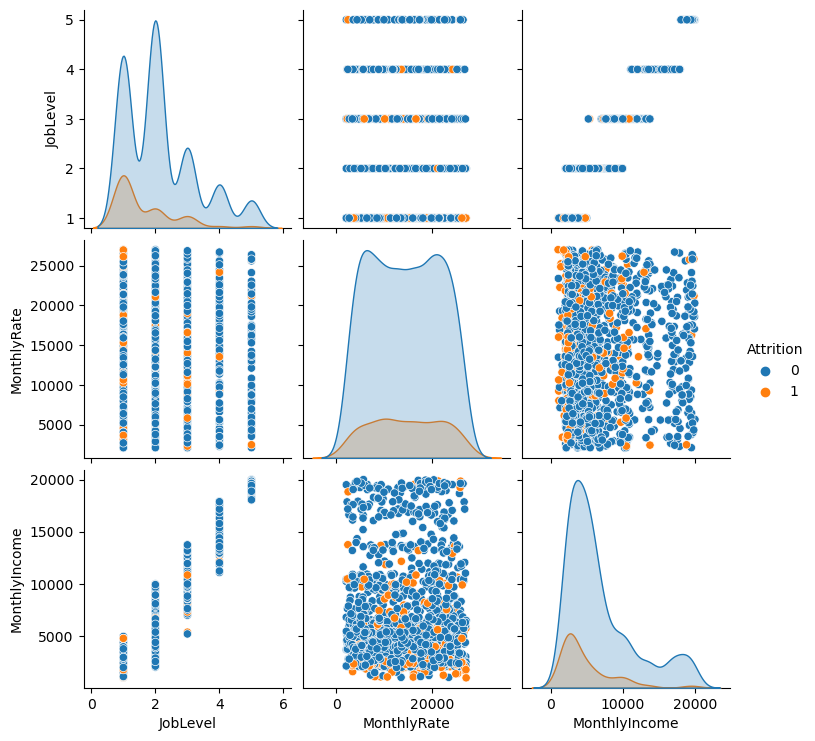

In [46]:
sns.pairplot(data=attrition,hue='Attrition',vars=['JobLevel','MonthlyRate','MonthlyIncome'])

# JointPlot

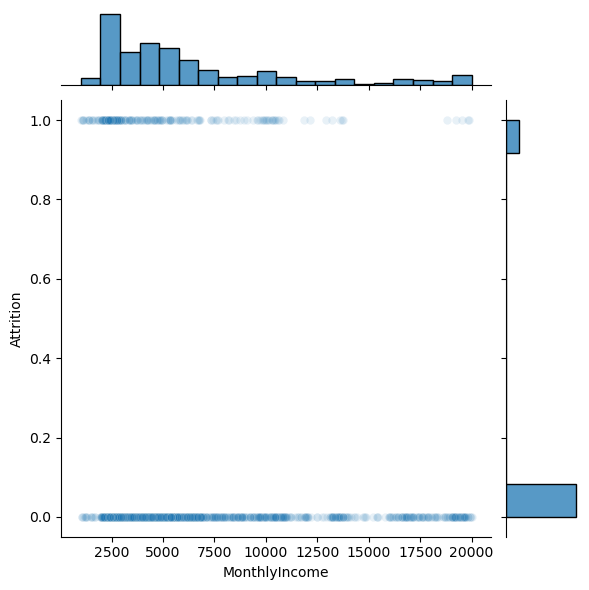

In [49]:
from scipy.stats import pearsonr
sns.jointplot(x='MonthlyIncome', y='Attrition', data=attrition, alpha=0.1)

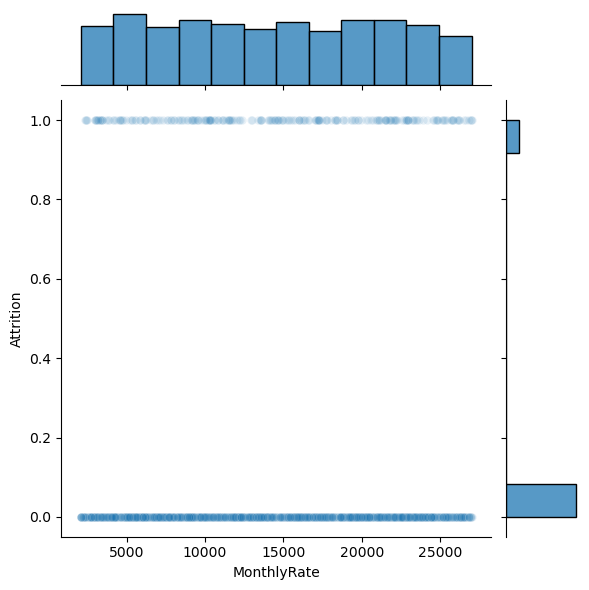

In [50]:

sns.jointplot(x='MonthlyRate', y='Attrition', data=attrition, alpha=0.1)

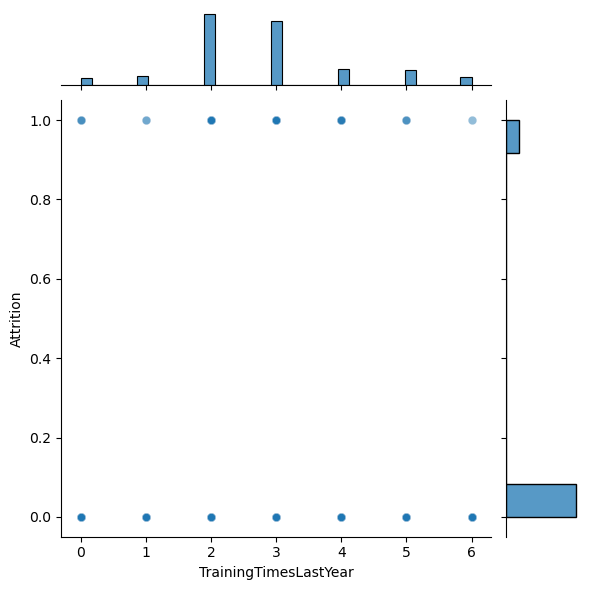

In [51]:

sns.jointplot(x='TrainingTimesLastYear', y='Attrition', data=attrition, alpha=0.1)

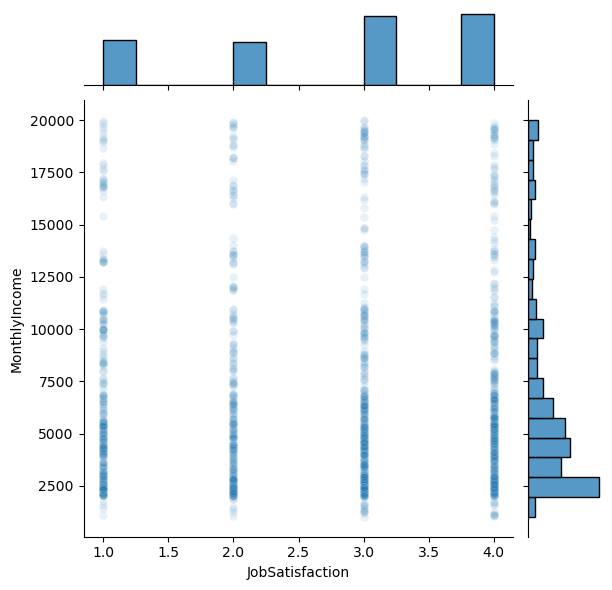

In [52]:

sns.jointplot(x='JobSatisfaction', y='MonthlyIncome', data=attrition, alpha=0.1)

# Training The Model

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [54]:
x_train.shape

(1029, 23)

In [55]:
y_train.shape

(1029,)

In [56]:
x_test.shape

(441, 23)

In [57]:
y_train.shape

(1029,)

In [58]:
y_test.shape

(441,)

In [59]:
#logistic regression
lg=LogisticRegression()

In [60]:
#training the model
lg.fit(x_train,y_train)

LogisticRegression()

In [61]:
#testing the model
pred=lg.predict(x_test)

In [62]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
accuracy_score(y_test,pred)

0.8616780045351474

In [64]:
print(confusion_matrix(y_test,pred))

[[380   0]
 [ 61   0]]


<Axes: >

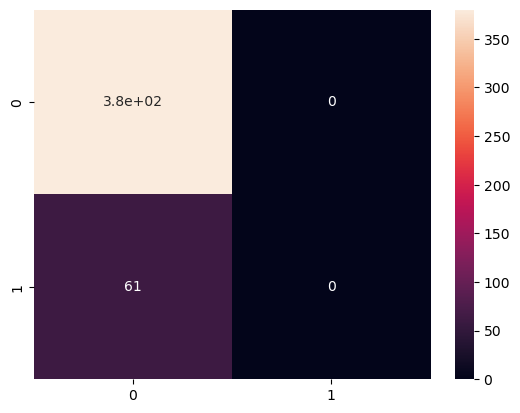

In [65]:
c=confusion_matrix(y_test,pred)
sns.heatmap(c,annot=True)

In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [67]:
mnb=MultinomialNB()

In [68]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [69]:
predmnb=mnb.predict(x_test)

In [70]:
predmnb

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [71]:
accuracy_score(y_test,predmnb)

0.5192743764172335

In [72]:
print(confusion_matrix(y_test,predmnb))

[[195 185]
 [ 27  34]]


In [73]:
print(classification_report(y_test,predmnb))

              precision    recall  f1-score   support

           0       0.88      0.51      0.65       380
           1       0.16      0.56      0.24        61

    accuracy                           0.52       441
   macro avg       0.52      0.54      0.45       441
weighted avg       0.78      0.52      0.59       441



In [74]:
gb=GaussianNB()

In [75]:
gb.fit(x_train,y_train)

GaussianNB()

In [76]:
predgb=gb.predict(x_test)

In [77]:
predgb

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [78]:
accuracy_score(y_test,predgb)

0.7868480725623582

In [79]:
knn=KNeighborsClassifier()

In [80]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
predknn=knn.predict(x_test)

In [82]:
predknn

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [83]:
accuracy_score(y_test,predknn)

0.8276643990929705

In [84]:
svc=SVC()

In [85]:
svc.fit(x_train,y_train)

SVC()

In [86]:
predsvc=svc.predict(x_test)

In [87]:
predsvc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [88]:
accuracy_score(y_test,predsvc)

0.8616780045351474

In [89]:
print(confusion_matrix(y_test,predsvc))

[[380   0]
 [ 61   0]]


In [90]:
print(classification_report(y_test,predsvc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [91]:
dtc=DecisionTreeClassifier()

In [92]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
preddtc=dtc.predict(x_test)

In [94]:
preddtc

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [95]:
accuracy_score(y_test,preddtc)

0.7755102040816326

In [96]:
print(confusion_matrix(y_test,preddtc))

[[320  60]
 [ 39  22]]


In [97]:
print(classification_report(y_test,preddtc))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       380
           1       0.27      0.36      0.31        61

    accuracy                           0.78       441
   macro avg       0.58      0.60      0.59       441
weighted avg       0.81      0.78      0.79       441



In [98]:
rfc=RandomForestClassifier()

In [99]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
predrfc=rfc.predict(x_test)

In [101]:
predrfc

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
accuracy_score(y_test,predrfc)

0.8594104308390023

In [103]:
print(confusion_matrix(y_test,predrfc))

[[371   9]
 [ 53   8]]


In [104]:
print(classification_report(y_test,predrfc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       380
           1       0.47      0.13      0.21        61

    accuracy                           0.86       441
   macro avg       0.67      0.55      0.56       441
weighted avg       0.82      0.86      0.82       441



In [105]:
gb=GradientBoostingClassifier()

In [106]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [107]:
predgb=gb.predict(x_test)

In [108]:
predgb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [109]:
accuracy_score(y_test,predgb)

0.8480725623582767

In [110]:
print(confusion_matrix(y_test,predgb))

[[364  16]
 [ 51  10]]


In [111]:
print(classification_report(y_test,predgb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       380
           1       0.38      0.16      0.23        61

    accuracy                           0.85       441
   macro avg       0.63      0.56      0.57       441
weighted avg       0.81      0.85      0.82       441



# AUC/ROC Curve

Comaparing the model using auc/roc curve and picking the best model

In [112]:
Y_pred_proba=lg.predict_proba(x_test)[:,1]

In [113]:
Y_pred_proba

array([0.17702285, 0.21625374, 0.37577662, 0.09735691, 0.05640165,
       0.21615726, 0.21860987, 0.20311672, 0.04311849, 0.2936986 ,
       0.24755086, 0.03115412, 0.20694571, 0.12045598, 0.27862615,
       0.09853022, 0.22202691, 0.03910803, 0.08987729, 0.06032444,
       0.1982457 , 0.11793021, 0.20135908, 0.21145311, 0.22577959,
       0.00623297, 0.34346881, 0.12678694, 0.20470223, 0.08978531,
       0.17185367, 0.14139456, 0.12028679, 0.14079272, 0.15115474,
       0.08745893, 0.08079888, 0.32744355, 0.24714545, 0.25022737,
       0.12647479, 0.17096199, 0.1772293 , 0.23483222, 0.41499553,
       0.1093843 , 0.22195254, 0.30440098, 0.14424849, 0.34765328,
       0.07928453, 0.20147626, 0.01737183, 0.12739952, 0.21942533,
       0.12270759, 0.12104042, 0.09630887, 0.15609405, 0.13094497,
       0.20768784, 0.32937338, 0.08054881, 0.05444525, 0.18231547,
       0.27743298, 0.11991101, 0.14297983, 0.19492058, 0.03372067,
       0.22058825, 0.08765921, 0.17204486, 0.05742203, 0.18868

In [114]:
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)

In [115]:
fpr

array([0.        , 0.        , 0.00263158, 0.00263158, 0.00526316,
       0.00526316, 0.00789474, 0.00789474, 0.01052632, 0.01052632,
       0.01315789, 0.01315789, 0.02631579, 0.02631579, 0.02894737,
       0.02894737, 0.03157895, 0.03157895, 0.04736842, 0.04736842,
       0.05      , 0.05      , 0.05263158, 0.05263158, 0.06578947,
       0.06578947, 0.06842105, 0.06842105, 0.07368421, 0.07368421,
       0.09210526, 0.09210526, 0.11052632, 0.11052632, 0.14473684,
       0.14473684, 0.17631579, 0.17631579, 0.18421053, 0.18421053,
       0.18684211, 0.18684211, 0.20263158, 0.20263158, 0.22631579,
       0.22631579, 0.25      , 0.25      , 0.25263158, 0.25263158,
       0.29473684, 0.29473684, 0.31842105, 0.31842105, 0.33421053,
       0.33421053, 0.33684211, 0.33684211, 0.33947368, 0.33947368,
       0.34473684, 0.34473684, 0.38421053, 0.38421053, 0.39210526,
       0.39210526, 0.39473684, 0.39473684, 0.39736842, 0.39736842,
       0.42368421, 0.42368421, 0.43947368, 0.43947368, 0.45263

In [116]:
tpr

array([0.        , 0.01639344, 0.01639344, 0.03278689, 0.03278689,
       0.04918033, 0.04918033, 0.06557377, 0.06557377, 0.08196721,
       0.08196721, 0.09836066, 0.09836066, 0.1147541 , 0.1147541 ,
       0.13114754, 0.13114754, 0.14754098, 0.14754098, 0.16393443,
       0.16393443, 0.18032787, 0.18032787, 0.21311475, 0.21311475,
       0.2295082 , 0.2295082 , 0.24590164, 0.24590164, 0.26229508,
       0.26229508, 0.27868852, 0.27868852, 0.29508197, 0.29508197,
       0.31147541, 0.31147541, 0.3442623 , 0.3442623 , 0.36065574,
       0.36065574, 0.37704918, 0.37704918, 0.39344262, 0.39344262,
       0.40983607, 0.40983607, 0.42622951, 0.42622951, 0.44262295,
       0.44262295, 0.45901639, 0.45901639, 0.47540984, 0.47540984,
       0.49180328, 0.49180328, 0.50819672, 0.50819672, 0.52459016,
       0.52459016, 0.54098361, 0.54098361, 0.55737705, 0.55737705,
       0.57377049, 0.57377049, 0.59016393, 0.59016393, 0.60655738,
       0.60655738, 0.62295082, 0.62295082, 0.63934426, 0.63934

In [117]:
thresholds

array([1.41499553, 0.41499553, 0.40650584, 0.40422137, 0.40010538,
       0.39776049, 0.39245185, 0.38938279, 0.37789805, 0.37577662,
       0.36715175, 0.36578524, 0.35415401, 0.34996683, 0.34843345,
       0.34765328, 0.34525572, 0.34474519, 0.33319509, 0.32937338,
       0.32878237, 0.32744355, 0.32562457, 0.32343292, 0.30731887,
       0.30440098, 0.30365391, 0.29878964, 0.29396485, 0.29378636,
       0.28711717, 0.28657223, 0.2779067 , 0.27743298, 0.26028965,
       0.25880075, 0.25022737, 0.24948304, 0.24721615, 0.24714545,
       0.24689275, 0.24679492, 0.24411869, 0.24261011, 0.23483222,
       0.23371929, 0.22525701, 0.22514509, 0.22202691, 0.22195254,
       0.21305535, 0.21280751, 0.20686555, 0.20580854, 0.20135908,
       0.20130439, 0.20119511, 0.20081387, 0.19967381, 0.19966045,
       0.19856619, 0.1982457 , 0.18607646, 0.18559825, 0.18319374,
       0.18231547, 0.18106842, 0.17990516, 0.17931927, 0.17777841,
       0.17500083, 0.1737506 , 0.17012268, 0.16691665, 0.16009

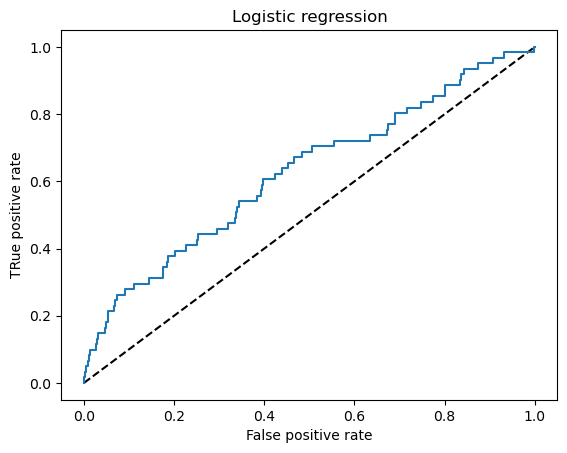

In [118]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Logistic regression')
plt.show()

In [119]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [120]:
print(auc_score)

0.5


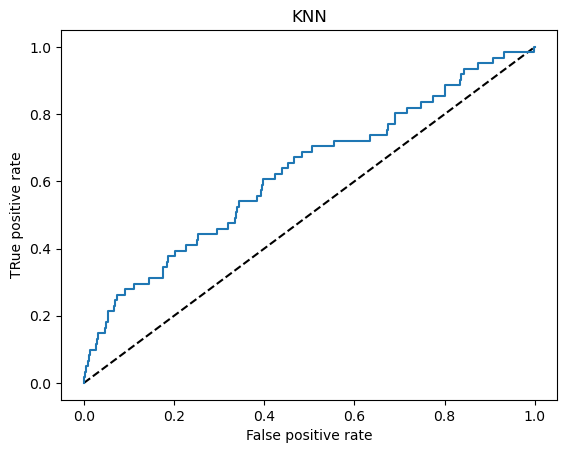

In [121]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('KNN')
plt.show()

In [122]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))

In [123]:
print(auc_score)

0.5284296807592753


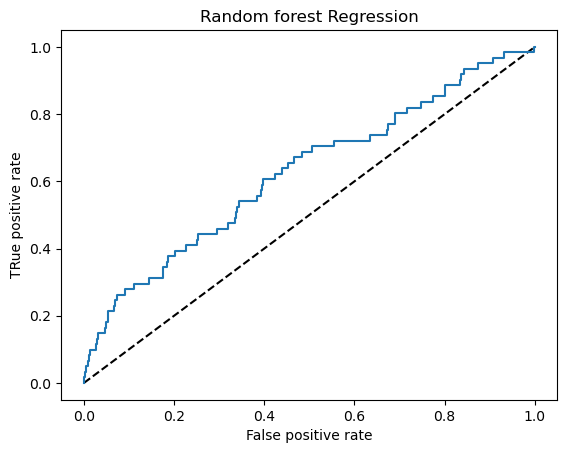

In [124]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Regression')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Random forest Regression')
plt.show()

In [125]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))

In [126]:
print(auc_score)

0.5537316652286454


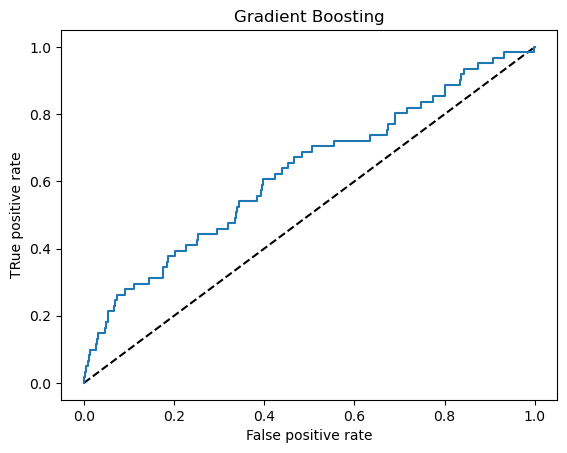

In [127]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Gradient Boosting')
plt.show()

In [128]:
auc_score=roc_auc_score(y_test,gb.predict(x_test))

In [129]:
print(auc_score)

0.5609145815358066


# Cross Validation Score

In [130]:
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lg,x_train,y_train,cv=k_folds)

In [131]:
print('The Best score for Logistic Regression is',score.mean())

The Best score for Logistic Regression is 0.8298934406819797


In [132]:

k_folds=KFold(n_splits=5)
score=cross_val_score(knn,x_train,y_train,cv=k_folds)

In [133]:
print('The Best score for KNN is',score.mean())

The Best score for KNN is 0.7997963533033389


In [134]:

k_folds=KFold(n_splits=5)
score=cross_val_score(gb,x_train,y_train,cv=k_folds)

In [135]:
print('The Best score for Gradient Boosting is',score.mean())

The Best score for Gradient Boosting is 0.8454605730523325


In [136]:

k_folds=KFold(n_splits=5)
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)

In [137]:
print('The Best score for Random forest is',score.mean())

The Best score for Random forest is 0.8483589865024864


# Hypertuning the best model

In [138]:
param_grid={'n_estimators':[100,101],'max_features':['auto','sqrt'],'min_samples_split':[20,30],'min_samples_leaf':[40,50],'bootstrap':[True,False]}

# Random Search CV

In [139]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=20,verbose=4,cv=5,random_state=45,n_jobs=-1)

In [140]:
rfc_cv=RandomizedSearchCV(RandomForestClassifier(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [20, 30],
                                        'n_estimators': [100, 101]})

In [142]:
print('Best Parameters',rfc_cv.best_params_)

Best Parameters {'n_estimators': 101, 'min_samples_split': 30, 'min_samples_leaf': 40, 'max_features': 'auto', 'bootstrap': False}


In [145]:
r_fit=RandomForestClassifier(n_estimators= 100, min_samples_split= 30, min_samples_leaf= 40, max_features='sqrt', bootstrap=False)

In [146]:
r_fit.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=40,
                       min_samples_split=30)

In [147]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [148]:
df

,Actual Data,predicted Data
1041,0,0
184,0,0
1222,1,0
67,0,0
220,0,0
...,...,...
1047,0,0
331,0,0
323,1,0
654,0,0


In [150]:
#Random Forest Classifier is the best model to predict the data